# Nootebook to calculate the coordinates of the DLAs

In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

### Read the data from both files

In [2]:
# specify the path to the two files with Lyman alpha skewers, with (ON) and without (OFF) self-shielding 
fname_off='/data/desi/common/astrid/spectra_ASTRID_self-shield_off_z2.5_500x500x2500.hdf5'
fname_on='/data/desi/common/astrid/spectra_ASTRID_z2.5_500x500x2500.hdf5'

In [3]:
with h5py.File(fname_on,'r') as f:
    tau_on = f['tau/H/1/1215'][:]
    colden = f['colden']['H/1'][:]
    axes = f['spectra/axes'][:]
    # (x,y,z) start of the skewers, in kpc/h
    cofm_hkpc = f['spectra/cofm'][:]

In [4]:
with h5py.File(fname_off,'r') as f:
    tau_off = f['tau/H/1/1215'][:]
    # column densities were not stored for this file (should be the same as in the other file)
    #colden_off = f['colden']['H/1'][:]
    axes_off = f['spectra/axes'][:]
    cofm_off = f['spectra/cofm'][:]

### Define the functions to find the skewers

In [5]:
# box lenght in Mpc/h
# this information should be stored in the HDF5, but I couldn't find it... so added it by hand
L_hMpc=250
# number of skewers per side (500)
Nsk=int(np.sqrt(colden.shape[0]))
print(Nsk,'skewers per side')
# number of pixels / cells per skewer (2500)
Np=int(colden.shape[1])
print(Np,'pixels per skewer')
# pixel width (in Mpc/h)
dz_hMpc=L_hMpc/Np
print('pixel width = {:.3f} Mpc/h'.format(dz_hMpc))
# minimum separation between skewers (in Mpc/h)
dxy_hMpc=L_hMpc/Nsk
print('skewer separation = {:.3f} Mpc/h'.format(dxy_hMpc))

500 skewers per side
2500 pixels per skewer
pixel width = 0.100 Mpc/h
skewer separation = 0.500 Mpc/h


In [6]:
def skewer_index(ix, iy):
    """Given the ix, iy indices, return the global index of a given skewer"""
    return ix*Nsk+iy

In [7]:
def skewer_ix_iy(isk):
    """Given the global index, return the (ix, iy) indices of a skewer"""
    ix=isk//Nsk
    iy=isk-ix*Nsk    
    return ix, iy

In [8]:
def skewer_xy_hMpc(isk):
    """Return the (x,y) coordinates of a given skewer, in Mpc/h"""
    ix, iy = skewer_ix_iy(isk)
    return dxy_hMpc*ix, dxy_hMpc*iy

### Find all the skewers with a certain maximum column density

In [35]:
max_colden=np.max(colden.reshape([Nsk,Nsk,Np]),axis=2)
dlas=[]
for i in range(Nsk):
    for j in range(Nsk):
        if max_colden[i][j] > 1e23:
            dlas.append([i,j])
print(dlas)

[[16, 218], [34, 16], [35, 347], [45, 364], [62, 489], [107, 425], [112, 183], [129, 199], [164, 191], [200, 497], [212, 336], [218, 334], [222, 137], [240, 117], [256, 418], [263, 341], [268, 128], [269, 372], [271, 214], [279, 54], [290, 191], [304, 28], [315, 324], [350, 79], [375, 440], [393, 82], [429, 415], [459, 315], [463, 232], [464, 39], [465, 406]]


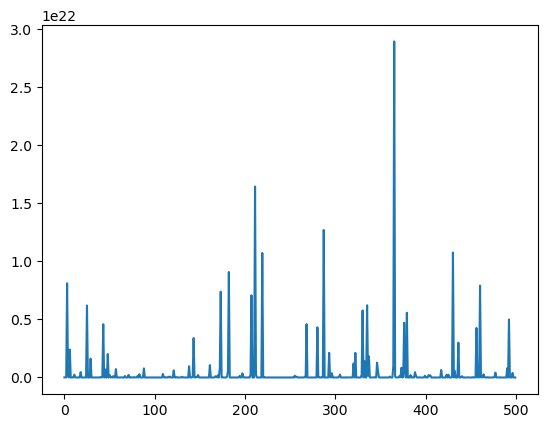

In [16]:
plt.plot(max_colden[0])

In [29]:
tau_on.shape

(250000, 2500)

In [62]:
z=np.array([])
for i in range(len(dlas)):
    z=np.append(z, np.argmax(tau_on[skewer_index(dlas[i][0],dlas[i][1])]))

In [63]:
coords_pixel=np.array([])
for i in range(len(dlas)):
    coords_pixel=np.append(coords_pixel,[dlas[i][0],dlas[i][1],z[i]])

### Now convert pixels to coordinates

In [64]:
coords = dz_hMpc*coords_pixel
print(coords)

[  1.6  21.8  69.1   3.4   1.6  64.2   3.5  34.7 220.    4.5  36.4 143.1
   6.2  48.9  35.   10.7  42.5 220.4  11.2  18.3  29.3  12.9  19.9 196.4
  16.4  19.1 178.1  20.   49.7 158.4  21.2  33.6  14.2  21.8  33.4 106.1
  22.2  13.7  61.5  24.   11.7 243.6  25.6  41.8  42.2  26.3  34.1 124.1
  26.8  12.8 123.3  26.9  37.2  69.2  27.1  21.4 129.4  27.9   5.4 157.
  29.   19.1 236.9  30.4   2.8  88.4  31.5  32.4 170.7  35.    7.9 219.8
  37.5  44.  198.5  39.3   8.2  56.   42.9  41.5  49.1  45.9  31.5 241.
  46.3  23.2  81.3  46.4   3.9  64.2  46.5  40.6  55.5]


### We can plot some of the skewers with DLAs

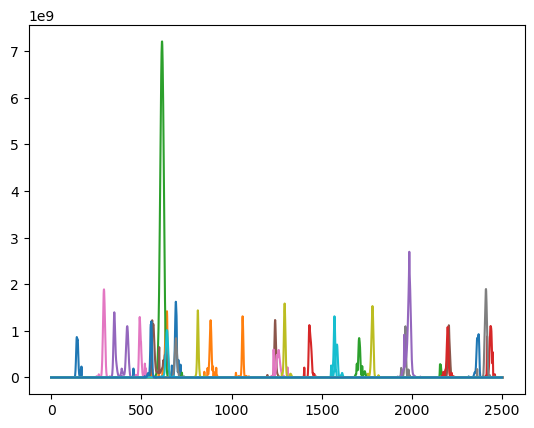

In [41]:
for i in range(len(dlas)):
    plt.plot(tau_on[skewer_index(dlas[i][0],dlas[i][1])])
